In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def liner_modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b)
    return f_wb

In [ ]:
def logistic_model (z):
    z = np.array(z)
    g_z = 1/(1+(np.exp(-z)))
    return g_z

In [ ]:
def Cost_logistic_regularized (x,y,w,b,lamda):
    f_wb = logistic_model(liner_modle(x,w,b))
    loss = []
    reg = []
    m,n = x.shape
    for i in range(m):
        loss.append( y[i]*np.log(f_wb[i]) + (1-y[i])*np.log(1-f_wb[i]))
    for j in range(n):
        reg.append(w[j]**2)
    total_cost = sum(loss) / -m + (lamda/(2*m))*sum(reg)
    return  total_cost

In [ ]:
def gradent_regularized (x,y,w,b,lamda):
    m,n =x.shape
    f_wb = logistic_model(liner_modle(x,w,b))
    dj_dw = []
    dj_db = []
    for j in range(n):
        cost = []
        for i in range(m):
            cost.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append(sum(cost)/m + (lamda/m)*w[j])

    for i in range(m):
        dj_db.append((f_wb[i]-y[i]))

    return dj_dw,sum(dj_db)/m

In [ ]:
def gradent_descent(x,y,w,b,alpha,num_iter,lamda):
    for i in range(num_iter):
        dj_dw ,dj_db = gradent_regularized(x,y,w,b,lamda)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db

        if i%1000 == 0:
            print ("iter {}: w = {} & b = {} ".format(i,w,b))

    print("the optimal value for w = {} & b = {}".format(w,b))
    return w,b

In [ ]:
df0 = pd.read_csv("/content/creditcard.csv")

In [ ]:
df0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df0["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
frq = pd.DataFrame(df0.groupby("Class").count()["V1"]).reset_index()
frq

,Class,V1
0,0,284315
1,1,492


In [ ]:
print("{} % of dataset are legit ===> 0".format((284315/284807)*100))
print("{} % of dataset are fraud ===>1".format((492/284807)*100))

99.82725143693798 % of dataset are legit ===> 0
0.1727485630620034 % of dataset are fraud ===>1


In [ ]:
pd.DataFrame(df0.isnull().sum())

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df0.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

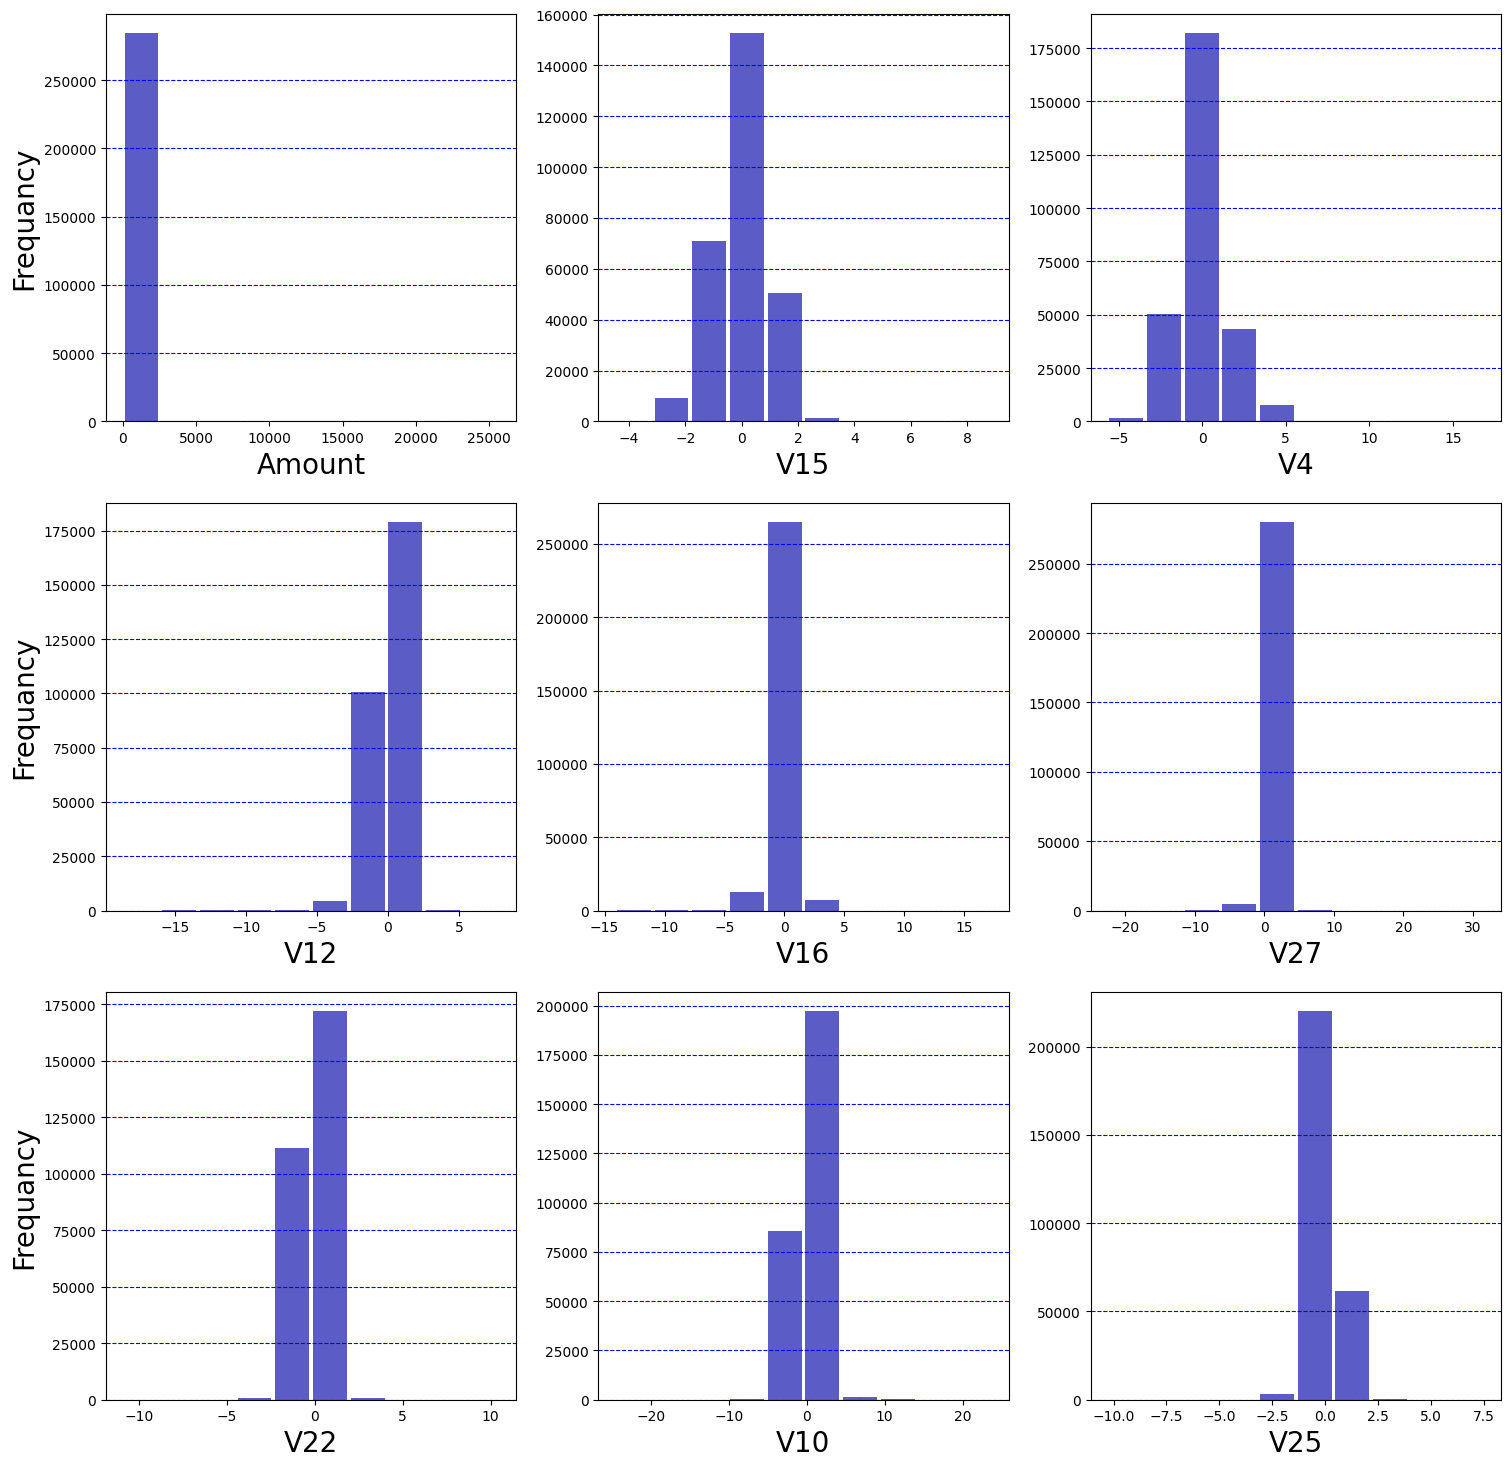

In [ ]:
plt.figure()
features = ['Amount','V15','V4', 'V12', 'V16','V27','V22','V10','V25']
l = len(features)
plt.figure(figsize=(18,18))
for i in range (l):
    plt.subplot(3,3,i+1)
    plt.hist(df0[features[i]],color='#0504aa',alpha = 0.65,rwidth=0.9)
    plt.xlabel(features[i],size = 20)
    if i == 0 or i == 3 or i == 6:
        plt.ylabel("Frequancy",size = 20)

    plt.xticks()
    plt.yticks()


    plt.grid(axis = "y" , linestyle = "--",color = "b")
plt.show()

<Figure size 640x480 with 0 Axes>

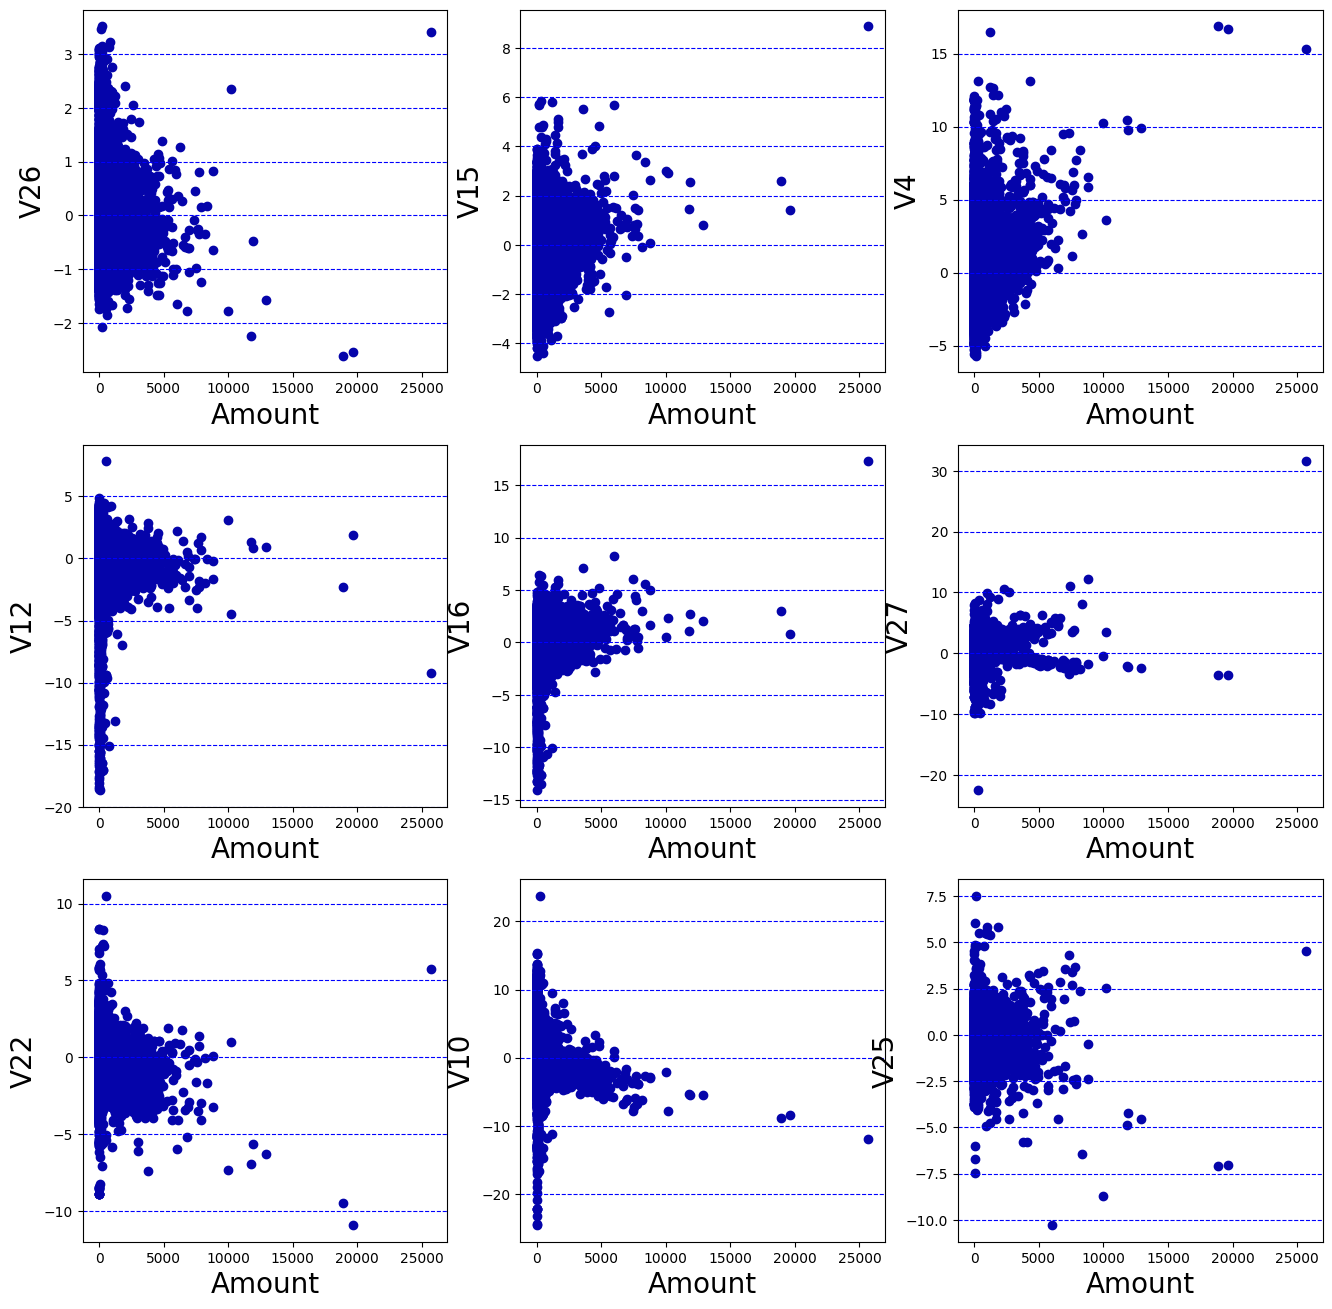

In [ ]:
plt.figure()
features = ['V26','V15','V4', 'V12', 'V16','V27','V22','V10','V25']
l = len(features)
plt.figure(figsize=(16,16))
for i in range (l):
    plt.subplot(3,3,i+1)
    plt.scatter(df0[ 'Amount'],df0[features[i]],color='#0504aa')
    plt.xlabel( 'Amount',size = 20)
    plt.ylabel(features[i],size = 20)

    plt.xticks()
    plt.yticks()

    plt.grid(axis = "y" , linestyle = "--",color = "b")
plt.show()

In [ ]:
legit = df0.loc[df0["Class"] == 0]
fraud = df0.loc[df0["Class"] == 1]
legit_492 = legit.sample(n =492 )
legit_492

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238848,149850.0,-0.959738,-0.175233,2.922342,-1.512422,-1.554375,-0.546556,0.030978,0.105919,-0.670026,...,0.031528,0.352318,-0.009021,0.809140,0.261171,-0.309423,0.068462,0.093313,101.75,0
117556,74718.0,0.535921,-2.013279,0.752361,-0.435856,-1.029596,2.137885,-1.157165,0.718080,-0.185694,...,0.354515,0.638007,-0.141565,-0.959645,-0.068738,-0.165308,0.065594,0.052404,307.96,0
219012,141559.0,1.861438,-0.509791,-0.910885,0.064051,0.148488,0.580824,-0.386972,0.124995,0.815923,...,-0.172737,-0.540260,0.231438,-0.225418,-0.335369,-0.668987,0.016619,-0.028228,84.58,0
113296,73013.0,1.022780,0.006002,0.891611,1.727592,-0.500874,0.032547,-0.259307,0.049905,-0.414797,...,0.181894,0.402071,-0.055732,0.157291,0.153481,1.048812,-0.051822,0.025808,77.38,0
47233,43139.0,0.950305,-0.955380,0.881109,0.650806,-1.454708,-0.147882,-0.653918,0.071491,-0.698903,...,-0.090020,-0.003410,-0.168058,0.528965,0.405437,-0.267962,0.044767,0.051658,158.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274923,166278.0,1.664579,-0.960933,-0.548657,0.761790,-0.925946,0.120593,-1.028214,0.282169,1.762416,...,0.198949,0.297394,0.098981,0.358110,-0.564500,0.303814,-0.005550,0.024290,164.69,0
221932,142753.0,-0.260418,1.269995,-0.957970,-0.166230,-0.149210,-1.279760,0.175012,0.461596,-0.330163,...,0.453541,1.169755,-0.030992,0.030427,-0.220420,-0.161293,-0.329337,-0.153105,1.00,0
203025,134610.0,-1.333947,0.350672,2.151364,0.689192,-0.794559,0.946045,-0.010122,-0.270073,2.040355,...,0.260629,1.427235,-0.226329,0.076994,-1.201456,-0.814783,-1.474364,-0.660101,59.00,0
56779,47590.0,-2.006554,1.880853,0.673404,-1.787131,-0.383459,-0.678079,0.418330,0.182951,1.285930,...,-0.376837,-0.268404,-0.047091,0.012840,0.005247,0.644759,-0.105188,-0.600776,1.15,0


In [ ]:
legit["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
Balanced_data  = pd.concat([legit_492,fraud],axis = 0)
print(Balanced_data.groupby("Class").count()["Amount"])

Class
0    492
1    492
Name: Amount, dtype: int64


In [ ]:
Balanced_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94306.804878,-0.036729,-0.050037,0.043369,0.050050,0.004293,-0.022743,0.039291,0.021321,0.060400,...,-0.037023,0.055047,0.024026,-0.028058,0.052861,-0.050904,-0.000393,-0.009207,0.036594,86.373089
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
x0 = Balanced_data.drop(columns=["Class","Time","Amount"])
Time = Balanced_data["Time"] /172792.0
Amount = Balanced_data["Amount"] / 25691.160

x = pd.concat([x0,Time,Amount],axis=1)
y = Balanced_data["Class"]

splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
w_init = [-100.68945558,   35.2478747,  -148.83462087,  163.96260462,  -64.21715191,
  -35.36493744,  -80.81419172, -34.63329371, -58.86985964,-219.05750797,
  144.84037738, -258.37861001, -45.89664322, -252.75753694, -8.02281702,
 -178.70256422, -328.12503387, -126.80404115,  59.70566869, -20.7805349,
    0.57968311,   30.19363772,  -26.55818053,  -0.89159735, -19.76165642,
  -18.21468873,   33.40571354,    5.85047169,  3.58037642, -52.49714916]
b_init = -503.658

training the model

In [ ]:
w,b= gradent_descent(x_train,y_train,w_init,b_init,0.3,8000,0.1)

<ipython-input-3-faa7871b6abf>:3: RuntimeWarning: overflow encountered in exp
  g_z = 1/(1+(np.exp(-z)))


iter 0: w = [-100.66323875   35.25811631 -148.81612459  163.96538383  -64.20009543
  -35.36958595  -80.81794568  -34.63127578  -58.86774814 -219.05383946
  144.83596654 -258.37445014  -45.89622669 -252.75259635   -8.02623457
 -178.69517935 -328.10809565 -126.79685607   59.69837181  -20.77477232
    0.57830586   30.19453654  -26.55572845   -0.89385636  -19.75903062
  -18.21457787   33.40769036    5.84584393    3.58483598  -52.49515701] & b = -503.646182972879 
iter 1000: w = [ -78.19681554   42.46354364 -132.24933162  167.00273847  -49.30990216
  -39.33310243  -84.14872312  -35.51948557  -56.64152762 -215.07934234
  139.09718729 -254.22539994  -46.10339717 -245.83570432  -11.42604097
 -172.8774314  -311.81520137 -119.7576618    52.81394528  -14.44350074
    1.88627947   30.3923354   -24.54575278   -3.08573386  -17.63741445
  -18.05482868   35.26834996    1.40408935    8.28377782  -50.50436488] & b = -491.4342299143295 
iter 2000: w = [ -62.46449207   47.14974762 -116.97856551  166.50335

testing the model

In [ ]:
z = liner_modle(x_test,w,b)
predection = 100*logistic_model(z)

<ipython-input-3-faa7871b6abf>:3: RuntimeWarning: overflow encountered in exp
  g_z = 1/(1+(np.exp(-z)))


In [ ]:
list(predection)
y_predection = []
for i in range (len(predection)):
    if predection[i] >= 50:
        y_predection.append(1)
        print (
        "example:{} is {} % Fraudulent Transaction ===> Fraudulent Transaction".format(i+1,predection[i])
              )
    else:
        y_predection.append(0)
        print (
        "example:{} is {} % Fraudulent Transaction ===> legitimate Transaction".format(i+1,predection[i])
              )
y_predection = np.array(y_predection)

example:1 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:2 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:3 is 2.3838962546595934e-122 % Fraudulent Transaction ===> legitimate Transaction
example:4 is 1.4280655535660007e-194 % Fraudulent Transaction ===> legitimate Transaction
example:5 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:6 is 3.6870346427368506e-164 % Fraudulent Transaction ===> legitimate Transaction
example:7 is 4.595751013640732e-96 % Fraudulent Transaction ===> legitimate Transaction
example:8 is 2.3965653102375887e-75 % Fraudulent Transaction ===> legitimate Transaction
example:9 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:10 is 1.1348503316408992e-129 % Fraudulent Transaction ===> legitimate Transaction
example:11 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:12 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:13 is 100.0 % Fraudu

In [ ]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
y_predection

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

evaluating a model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predection))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       102
           1       0.97      0.89      0.93        95

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

